#Quantum Random Walk
  Quantum walks are quantum-mechanical implementations of simple random walks and are largely analogous. Instead of our particle having a definite integer position, it’s in a superposition of integer position eigenstates. Instead of flipping a coin and adding the resulting value to our position, we act on our state with a special operator U in each step, and repeatedly acting on our state with U will leave us with our “final” distribution.

  Imagine a spin-½ particle on a line, whose spin is described by a superposition of the two spin states |↑⟩ and |↓⟩, and whose position is described by a superposition of the position eigenstates |0⟩, |-1⟩, |1⟩, |-2⟩, |2⟩… If we observe the spin we can only measure up or down, and if we observe this particle’s position we can only measure an integer position. The state of the particle is described in the tensor product of these two spaces.

##Operators
Each “step” of the quantum random walk is carried out by applying a unitary operator U=S(C⊗I). Note that U is composed of two operators applied successively:
#1. Coin Shift Operator/ Coin Operator
The first is the coin-flip operator or coin operator C, which fans out a state according to its spin (by rotating it to an orthogonal state). One familiar choice for C is the Hadamard operator H. With C=H, applying C⊗I to 1/sqrt(2) (|↑⟩⊗|0⟩ + |↓⟩⊗|1⟩) would give us 1/2((|↑⟩+|↓⟩)⊗|0⟩ + (|↑⟩-|↓⟩)⊗|1⟩).

The Hadamard coin is considered fair because it leaves us with an equal superposition of two directions (rather than biasing the probability in either direction).
#2. Conditional Translation Operator S
The second is the conditional translation operator S, which will add one to a position if the spin is up, and subtract one to a position if the spin is down.

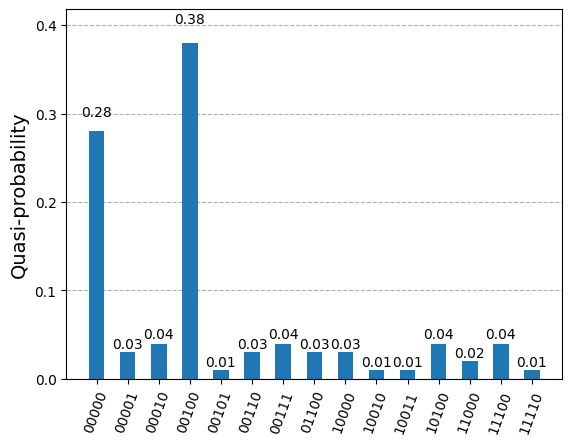

In [22]:
def quantum_random_walk(num_steps):
    # Calculate the total number of qubits needed for the walk.
    # We use `num_steps * 2 + 1` to account for the positions to the left and right of the origin,
    # plus the origin itself, ensuring enough qubits to represent all possible positions.
    n = num_steps * 2 + 1

    # Create a quantum circuit with `n` qubits and `n` classical bits.
    # The qubits will represent the possible positions of the walker.
    # The classical bits will be used to store the measurement results.
    qrw = QuantumCircuit(n, n)

    # Initialize the walker in a superposition state at the middle qubit.
    # `n // 2` gives the index of the middle qubit.
    qrw.h(n // 2)

    # Perform the quantum walk for the specified number of steps.
    for step in range(num_steps):
        # Coin operator: Apply the Hadamard gate to all qubits.
        # This step creates a superposition of moving left or right for each qubit.
        qrw.h(range(n))

        # Shift operator: Entangle the qubits to create a quantum walk effect.
        # Apply controlled phase operations to adjacent qubits to shift the walker's position.
        for i in range(n - 1):
            qrw.cp(-1.0, i, i + 1)  # Controlled phase shift with an angle of -1 radian.

        # Add a barrier to separate the steps clearly in the circuit diagram.
        qrw.barrier()

    # Measure the final state of the qubits.
    # This collapses the superposition into a specific position.
    qrw.measure(range(n), range(n))

    return qrw

# Specify the number of steps for the quantum random walk.
num_steps = 2

# Generate the quantum circuit for the random walk with the specified number of steps.
qc = quantum_random_walk(num_steps)

# Import Qiskit tools for simulation and circuit manipulation.
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Choose the QASM simulator to simulate the quantum circuit.
simulator = Aer.get_backend('qasm_simulator')

# Transpile the quantum circuit for the simulator backend.
# Transpilation optimizes the circuit for execution on the chosen backend.
tqc = transpile(qc, simulator)

# Execute the transpiled circuit on the simulator with a specified number of shots.
# The result will include the counts of each measured state.
result = simulator.run(tqc, shots=100).result()

# Get the measurement results (counts of each state) from the simulation.
counts = result.get_counts(qc)

# Calculate the total number of shots to normalize the counts into probabilities.
total_shots = sum(counts.values())

# Normalize the counts to get the probability distribution of the final states.
probabilities = {state: count / total_shots for state, count in counts.items()}

# Plot the probability distribution as a histogram.
plot_histogram(probabilities)



Random walks are fundamental concepts used in various fields such as physics, computer science, and finance to model paths consisting of a succession of random steps. In the classical and quantum contexts, these walks exhibit different behaviors and properties due to the underlying principles governing each system. Let’s delve into the differences between classical and quantum random walks, their characteristics, and applications.

### Classical Random Walks

**Definition:**
A classical random walk is a mathematical process that describes a path consisting of a sequence of random steps in some space, often modeled on a graph or a lattice.

**Characteristics:**
1. **Memoryless Process (Markovian):**
   - Each step in the walk is independent of the previous steps. The probability of moving to a new position only depends on the current position.
   
2. **Transition Probabilities:**
   - The probabilities of moving to adjacent nodes or positions are typically uniform or follow a predefined probability distribution.

3. **Diffusion Behavior:**
   - The distribution of the walker's position after \( n \) steps spreads out over time, following a normal distribution in many cases. The standard deviation grows as \( \sqrt{n} \).

4. **Examples:**
   - Coin flipping to decide movement on a line.
   - Drunkard's walk: randomly moving north, south, east, or west on a grid.

5. **Applications:**
   - Modeling stock prices in finance.
   - Algorithms in computer science (e.g., search algorithms).
   - Diffusion processes in physics and chemistry.

**Mathematical Representation:**
In a 1D classical random walk, at each step, the walker moves left or right with equal probability \( \frac{1}{2} \):
\[ P(x, t+1) = \frac{1}{2} P(x-1, t) + \frac{1}{2} P(x+1, t) \]

### Quantum Random Walks

**Definition:**
A quantum random walk extends the concept of a classical random walk to the quantum domain. It leverages quantum superposition and interference, resulting in fundamentally different dynamics.

**Characteristics:**
1. **Superposition:**
   - At each step, the quantum walker can be in a superposition of multiple positions simultaneously, described by a complex amplitude for each position.

2. **Unitary Evolution:**
   - The evolution of the quantum walk is governed by unitary operators, preserving the total probability (the sum of probabilities over all possible positions is 1).

3. **Interference:**
   - Quantum walks exhibit interference effects, where different paths can interfere constructively or destructively, significantly altering the probability distribution compared to classical walks.

4. **Faster Spreading:**
   - The standard deviation of the position grows linearly with time (\( n \)), leading to a faster spread compared to the \( \sqrt{n} \) growth in classical random walks.

5. **Examples:**
   - Quantum coin flipping to decide the direction and superposition states.
   - Quantum walk on a line or a graph.

6. **Applications:**
   - Quantum computing and algorithms (e.g., speedup for database search problems).
   - Quantum cryptography and network protocols.
   - Quantum simulations in physics.

**Mathematical Representation:**
In a 1D quantum random walk with a coin (state of the walker):
- The walker's state is described by a vector \( | \psi(t) \rangle \) in a Hilbert space.
- The evolution is given by applying a coin operator \( C \) followed by a shift operator \( S \):
\[ | \psi(t+1) \rangle = S (C | \psi(t) \rangle) \]

### Comparison

| Feature                   | Classical Random Walk                         | Quantum Random Walk                            |
|---------------------------|-----------------------------------------------|-----------------------------------------------|
| **Process Type**          | Memoryless (Markovian)                        | Quantum (Unitary, Reversible)                 |
| **State Representation**  | Probability distribution                      | Quantum state (superposition of amplitudes)   |
| **Step Evolution**        | Random step based on transition probabilities | Unitary evolution using quantum operators     |
| **Spreading Rate**        | Diffusion (\( \sigma \sim \sqrt{n} \))        | Ballistic (\( \sigma \sim n \))               |
| **Interference Effects**  | None                                          | Significant (constructive and destructive)    |
| **Typical Applications**  | Modeling diffusion, search algorithms         | Quantum algorithms, quantum simulations       |

### Conclusion

Classical and quantum random walks are powerful tools with distinct behaviors and applications. Classical random walks provide a straightforward model for many stochastic processes and have a broad range of practical uses. Quantum random walks, with their richer structure due to superposition and interference, offer potential for breakthroughs in computational efficiency and new insights into quantum systems.

Understanding these differences is crucial for applying these concepts in appropriate contexts, whether for classical systems or emerging quantum technologies.